In [1]:
%matplotlib notebook

import numpy as np
import os
import fabio
import matplotlib.pyplot as plt
from smi_analysis import SMI_beamline, stitch

### Tu dois modifier le chemin vers le dossier ou les datas sont stockees

In [2]:
path = 'C:\\Users\\GF237276\\Desktop\\Projets\\CEA\\ICAR\\Demande_2442005_Massoni\\data\\'
for file in os.listdir(path):
    print(file)
    
# files = ['Guillaume_0_vd_00001-00002.dat',
#          'Guillaume_0_vd_00001-00002.edf',
#          'Guillaume_0_vd_00003-00004.dat',
#          'Guillaume_0_vd_00003-00004.edf',
#          'Guillaume_0_vd_00007-00008.dat',
#          'Guillaume_0_vd_00007-00008.edf',
#          'Guillaume_0_vd_00009-00010.dat',
#          'Guillaume_0_vd_00009-00010.edf',
#         ]

Guillaume_0_vd_00000-00001.edf
Guillaume_0_vd_00002-00003.edf
Guillaume_0_vd_00004-00005.edf


<IPython.core.display.Javascript object>


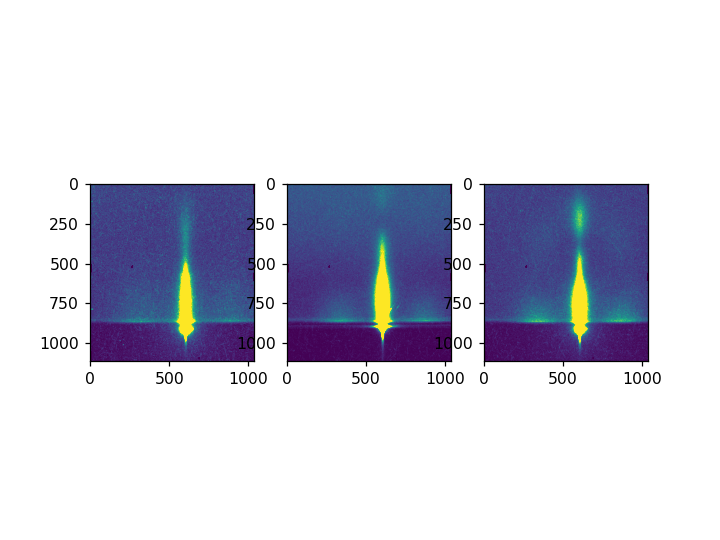

In [4]:
file1 = 'Guillaume_0_vd_00000-00001.edf'
file2 = 'Guillaume_0_vd_00002-00003.edf'
file3 = 'Guillaume_0_vd_00004-00005.edf'

img1 = fabio.open(os.path.join(path, file1)).data
img2 = fabio.open(os.path.join(path, file2)).data
img3 = fabio.open(os.path.join(path, file3)).data

plt.figure()
plt.subplot(131)
plt.imshow(img1, vmin=0, vmax=np.percentile(img1, 97))
plt.subplot(132)
plt.imshow(img2, vmin=0, vmax=np.percentile(img2, 97))
plt.subplot(133)
plt.imshow(img3, vmin=0, vmax=np.percentile(img3, 97))
plt.show()

<IPython.core.display.Javascript object>


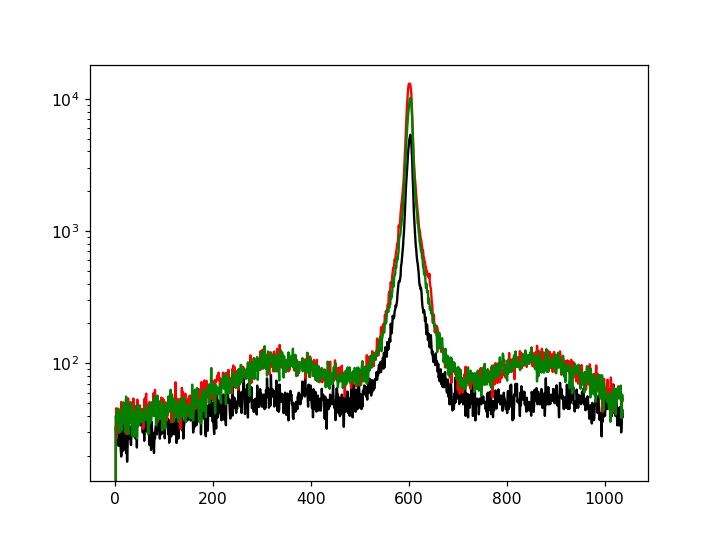

In [9]:
plt.figure()
plt.plot(np.sum(img1[800:830, :], axis=0), 'k')
plt.plot(np.sum(img2[800:830, :], axis=0), 'r')
plt.plot(np.sum(img3[800:830, :], axis=0), 'g')

plt.yscale('log')
plt.show()

### Lecture des info dans le header. Pas besoin de modif

In [11]:
def read_header_xeuss(path, file):
    img = fabio.open(os.path.join(path, file))

    center = [float(img.header['Center_1']), 1041]
    sdd = 1000 * float(img.header['SampleDistance'])
    wav = float(img.header['Wavelength'])

    alphai = float(img.header['phi'])  # To be checked
    alphai = np.deg2rad(0.25)

    # Definition detecteur
    gamma = float(img.header['Gamma'])
    delta = float(img.header['Delta'])
    rot1 = -gamma * (np.pi / 180)
    rot2 = -delta * (np.pi / 180)
    rot3 = -np.arccos(1 / (np.sqrt(np.tan(np.deg2rad(gamma)**2) * np.sin(np.deg2rad(delta)**2) + 1))) * (
                       np.pi / 180)
    
    sample = img.header['Sample']
    
    return sdd, wav, alphai, center, rot1, rot2, rot3, sample

sdd, wav, alphai, center, rot1, rot2, rot3, sample = read_header_xeuss(path, file1)

In [12]:
np.rad2deg(alphai)

0.25

In [13]:
fabio.open(os.path.join(path, file1)).header

{
  "EDF_DataBlockID": "0.Image.Psd",
  "EDF_BinarySize": "4637784",
  "EDF_HeaderSize": "3584",
  "ByteOrder": "LowByteFirst",
  "DataType": "FloatValue",
  "Dim_1": "1038",
  "Dim_2": "1117",
  "Image": "0",
  "HeaderID": "EH:000000:000000:000000",
  "Size": "4637784",
  "title": "Guillaume_0_vd_00000-00001.edf",
  "Intensity1": "2e-19",
  "ExposureTime": "5000",
  "Dummy": "-1024",
  "DDummy": "0.1",
  "Offset_1": "0",
  "Offset_2": "0",
  "Center_1": "602.1808",
  "Center_2": "918.1508",
  "PSize_1": "7.5e-05",
  "PSize_2": "7.5e-05",
  "Sample": "sample_sow7-143",
  "SampleDistance": "0.499999",
  "SampleEnvKind": "gisaxs",
  "SampleEnvPN": "Advanced GiSAXS",
  "SampleEnvSN": "503",
  "WaveLength": "1.541891e-10",
  "RasterOrientation": "1",
  "Detector": "0",
  "DetectorModel": "Dectris EIGER2 Si 1M, S/N E-02-0299",
  "Monitor": "0",
  "History-1": "saxs_patch -omod n -i2off 0 0 -odim 1038 1117 -i1dum -1024 -i2dum -1024 -i1ddum 0.0001 -i2ddum 0.0001 -i2gna 0 3 +ex +pass /data0/im

### Test on one file

<IPython.core.display.Javascript object>


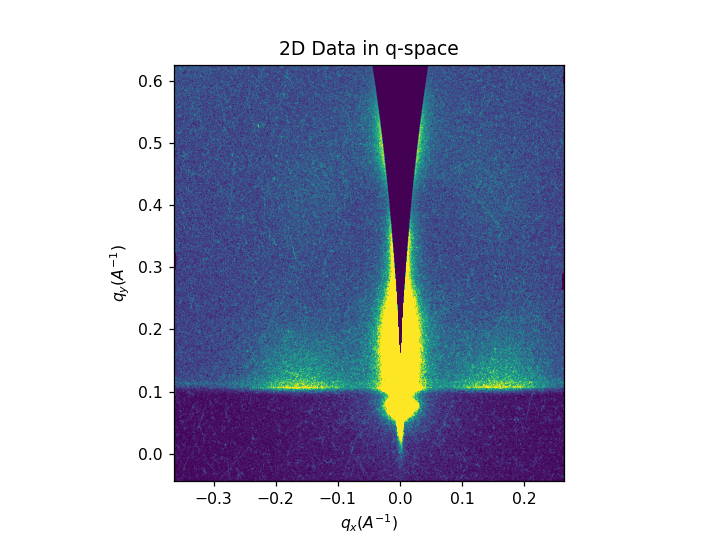

In [48]:
geometry = 'Reflection'
bs_pos_waxs = [[0,0]]
detector_waxs = 'Eiger1M_xeuss'

SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                     sdd=sdd,
                                     wav=wav,
                                     alphai=np.deg2rad(0.25),
                                     center=center,
                                     bs_pos=bs_pos_waxs,
                                     detector=detector_waxs,
                                     det_angles=[[rot1, rot2, rot3]])

SMI_waxs.open_data(path, [file3])
SMI_waxs.stitching_data()
plt.figure()
plt.title('2D Data in q-space')
plt.imshow(SMI_waxs.img_st,
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmin=0,
           vmax=np.percentile(SMI_waxs.img_st, 97))
plt.xlabel('$q_{x} (A^{-1}$)')
plt.ylabel('$q_{y} (A^{-1}$)')
plt.show()

#Tu peux modifier les valeur pour la coupe horizontale. Ici cela integre entre q 0.02 et 0.04
SMI_waxs.horizontal_integration(q_per_range=[0.12, 0.16])
qhor0, Ihor0 = SMI_waxs.q_hor, SMI_waxs.I_hor

SMI_waxs.vertical_integration(q_par_range=[0., 0.05])
qver0, Iver0 = SMI_waxs.q_ver, SMI_waxs.I_ver

<IPython.core.display.Javascript object>


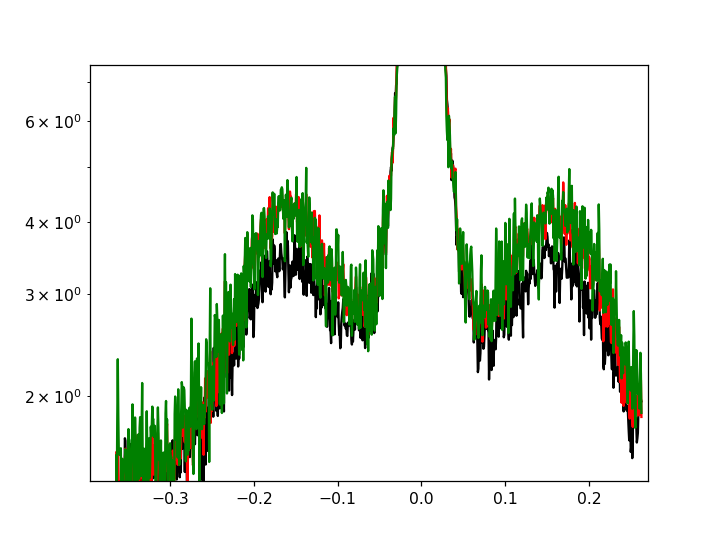

In [58]:
SMI_waxs.horizontal_integration(q_per_range=[0.12, 0.16])
qhor0, Ihor0 = SMI_waxs.q_hor, SMI_waxs.I_hor

SMI_waxs.horizontal_integration(q_per_range=[0.10, 0.14])
qhor1, Ihor1 = SMI_waxs.q_hor, SMI_waxs.I_hor

SMI_waxs.horizontal_integration(q_per_range=[0.115, 0.13])
qhor2, Ihor2 = SMI_waxs.q_hor, SMI_waxs.I_hor


plt.figure()
plt.plot(qhor0, Ihor0, color='k')
plt.plot(qhor1, Ihor1, color='r')
plt.plot(qhor2, Ihor2, color='g')
plt.yscale('log')
plt.show()

In [45]:
2*2*np.pi/0.34

36.95991357164462

In [ ]:
0.49, 0.4, 0.34

### Batch processing on several files (data reduction)

### First path to the data

sample_sow7-143


<IPython.core.display.Javascript object>


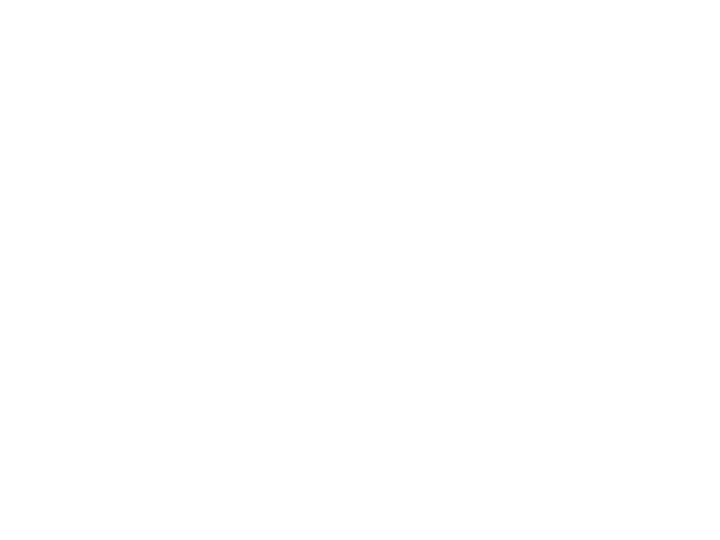

sample_sow7-144


<IPython.core.display.Javascript object>


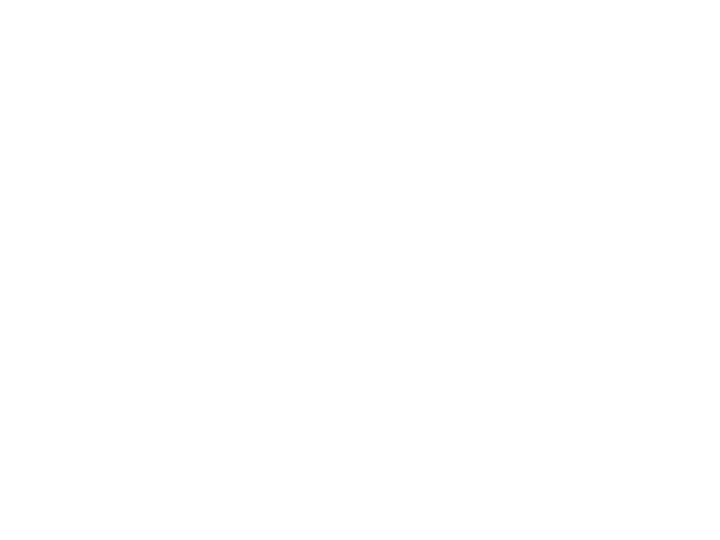

sample_sow7-145


<IPython.core.display.Javascript object>


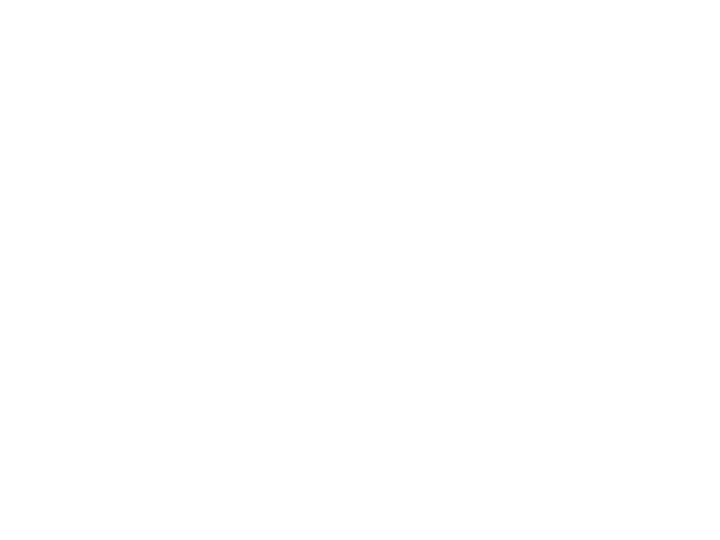

In [59]:
path = 'C:\\Users\\GF237276\\Desktop\\Projets\\CEA\\ICAR\\Demande_2442005_Massoni\\data\\'
ResDir = 'C:\\Users\\GF237276\\Desktop\\Projets\\CEA\\ICAR\\Demande_2442005_Massoni\\reduced_data\\'

files = ['Guillaume_0_vd_00000-00001.edf',
         'Guillaume_0_vd_00002-00003.edf',
         'Guillaume_0_vd_00004-00005.edf']

for i, fi in enumerate(files):
    geometry = 'Reflection'
    bs_pos_waxs = [[0,0]]
    detector_waxs = 'Eiger1M_xeuss'

    sdd, wav, alphai, center, rot1, rot2, rot3, sample = read_header_xeuss(path, fi)
    print(sample)
    
    SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                         sdd=sdd,
                                         wav=wav,
                                         alphai=alphai,
                                         center=center,
                                         bs_pos=bs_pos_waxs,
                                         detector=detector_waxs,
                                         det_angles=[[rot1, rot2, rot3]])


    SMI_waxs.open_data(path, [fi])
    SMI_waxs.stitching_data()

    plt.figure()
    plt.title('2D Data in q-space %s'%sample)
    plt.imshow(SMI_waxs.img_st,
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmin=0,
           vmax=np.percentile(SMI_waxs.img_st, 97))
    plt.xlabel('$q_{x} (A^{-1}$)')
    plt.ylabel('$q_{y} (A^{-1}$)')
    plt.show()


    SMI_waxs.caking(azimuth_range=[-180, 180], radial_range=[0, 3.6], npt_rad=1000, npt_azim=1000)

#         SMI_waxs.radial_averaging(radial_range=[0, 3.6], azimuth_range=[-180, 180], npt=2000)
#         q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

    SMI_waxs.horizontal_integration(q_per_range=[0.11, 0.13])
    qhor, Ihor = SMI_waxs.q_hor, SMI_waxs.I_hor

    SMI_waxs.vertical_integration(q_par_range=[0., 0.05])
    qver, Iver = SMI_waxs.q_ver, SMI_waxs.I_ver

    if True:
        #save the radial profile
        plt.savefig(os.path.join(ResDir, 'img_qspace_%s.png'%sample))
        np.savetxt(os.path.join(ResDir, 'hor_profile_%s.txt'%sample), np.vstack((qhor, Ihor)).T)
        np.savetxt(os.path.join(ResDir, 'ver_profile_%s.txt'%sample), np.vstack((qver, Iver)).T)
    plt.close()

### Comparaison des profile horizontaux

<IPython.core.display.Javascript object>


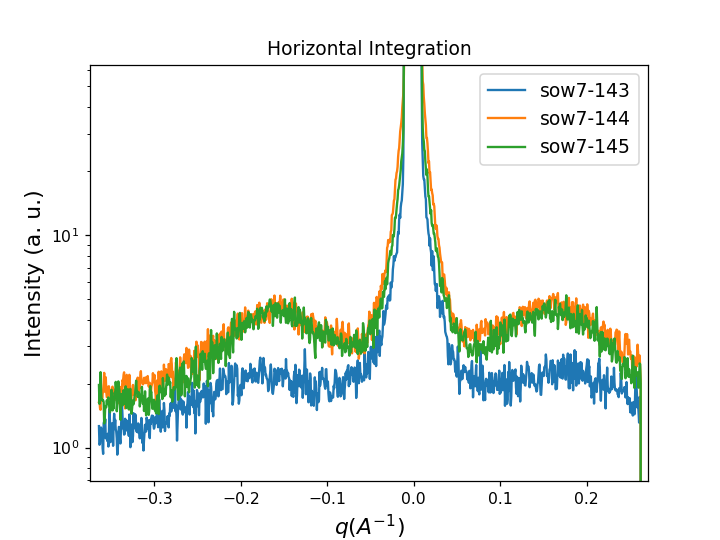

sow7-143
sow7-144
sow7-145


In [60]:
plt.figure()
plt.title('Horizontal Integration')
for fi in os.listdir(ResDir):
    if 'hor_profile' in fi:
        idx, idx1=fi.find('_profile'), fi.find('.txt')
        print(fi[idx+16:idx1])

        pr = np.loadtxt(os.path.join(ResDir, fi))
        plt.plot(pr[:, 0], pr[:, 1], label=fi[idx+16:idx1])
        
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('$q (A^{-1}$)', fontsize=14)
plt.ylabel('Intensity (a. u.)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [19]:
fi

'ver_profile_D5.txt'

hor_profile_sample_sow7-143.txt
[-0.3, -0.12]
106 403


<IPython.core.display.Javascript object>


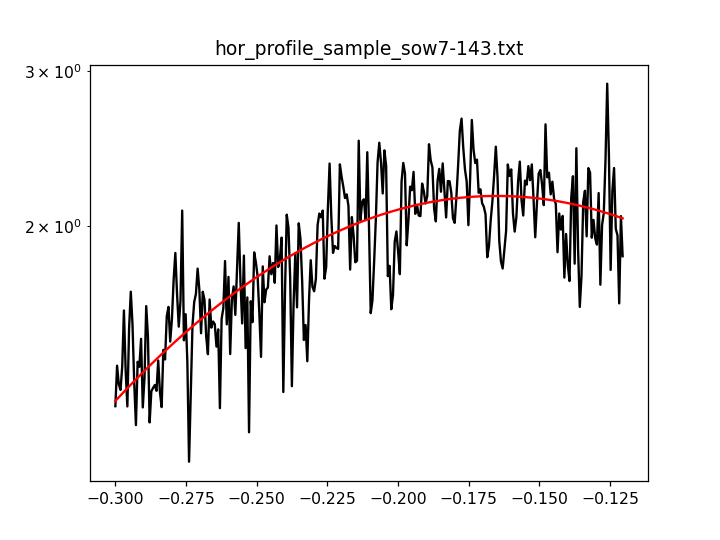

hor_profile_sample_sow7-144.txt
[-0.26, -0.1]
172 436


<IPython.core.display.Javascript object>


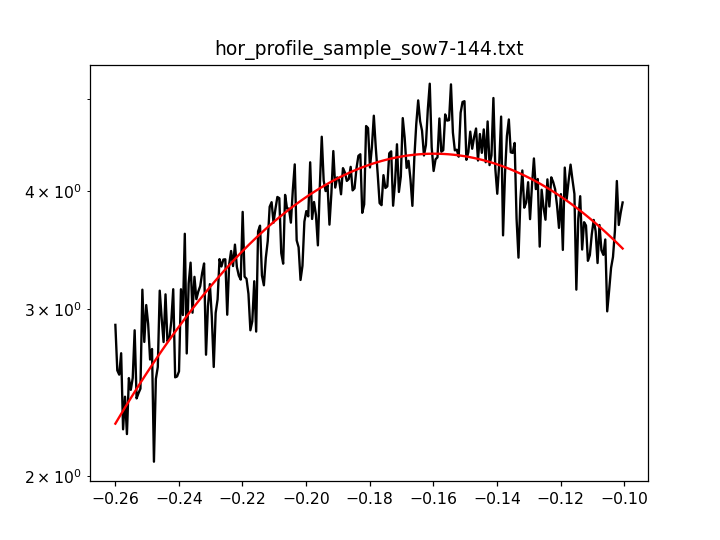

hor_profile_sample_sow7-145.txt
[-0.26, -0.1]
172 436


<IPython.core.display.Javascript object>


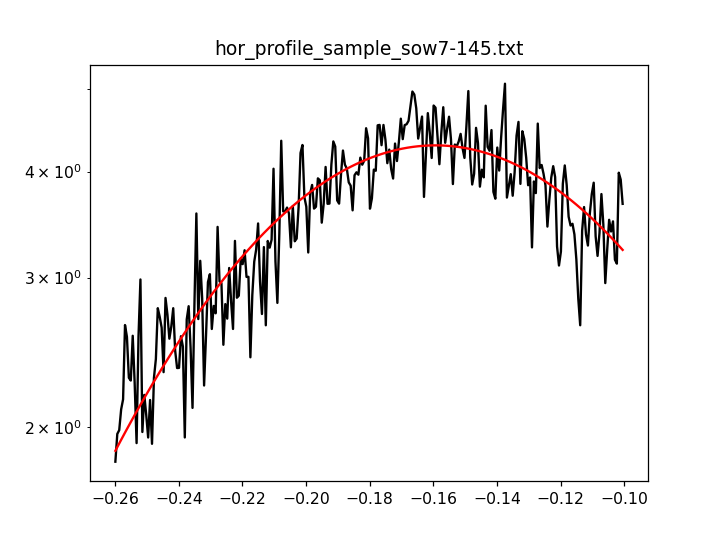

In [81]:
from astropy.modeling import models, fitting
i=0
qsss = [[-0.3, -0.12], 
        [-0.26, -0.1],
        [-0.26, -0.1],
       ]
all_mean, all_amp, all_stdev=[],[],[]

# plt.figure()
for fi in os.listdir(ResDir):
    if 'hor_profile' in fi:
        print(fi)
#         idx, idx1=fi.find('DNA'), fi.find('.txt')
        pr = np.loadtxt(os.path.join(ResDir, fi))
        
        qss = qsss[i]
        print(qss)
        idxmin = np.argmin(abs(pr[:, 0]-qss[0]))
        idxmax = np.argmin(abs(pr[:, 0]-qss[1]))
        print(idxmin, idxmax)
        q1, I1 = pr[idxmin:idxmax, 0], pr[idxmin:idxmax, 1]
        plt.figure()
        plt.title(fi)
        plt.plot(q1, I1, 'k')

        qs = q1
        intensities = I1

        g_init  = models.Gaussian1D(amplitude=np.max(intensities), mean=q1[np.argmax(intensities)], stddev=.001)
        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, qs, intensities)

        x = np.linspace(qs[0], qs[-1], 100)
        plt.plot(x, g(x), 'r')

        all_mean = all_mean + [g.mean.value]
        all_stdev = all_stdev + [g.stddev.value]
        all_amp = all_amp + [g.amplitude.value]

        plt.yscale('log')
        plt.show()
        i+=1


hor_profile_sample_sow7-143.txt
[0.1, 0.26]
766 1030


<IPython.core.display.Javascript object>


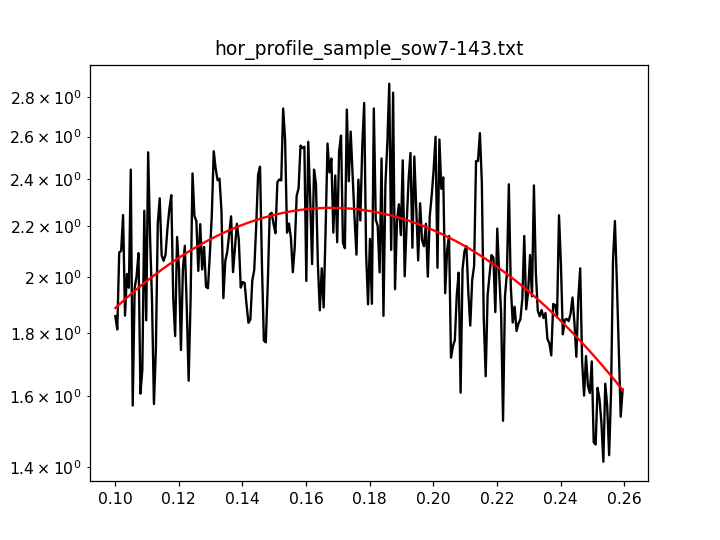

hor_profile_sample_sow7-144.txt
[0.1, 0.26]
766 1030


<IPython.core.display.Javascript object>


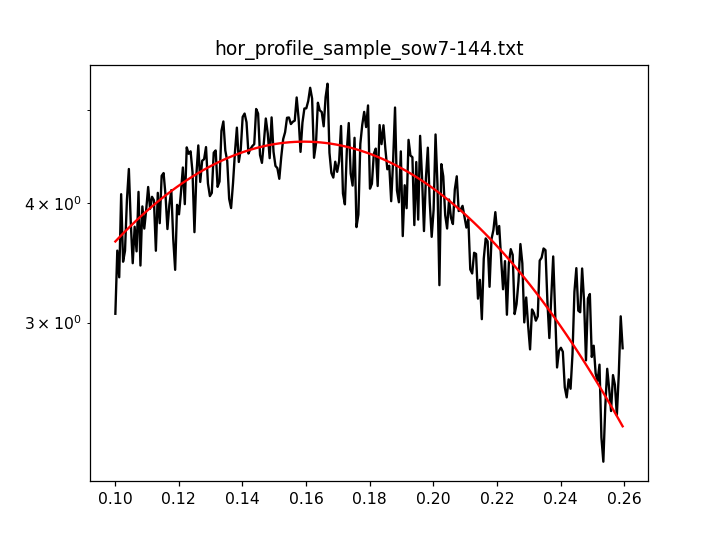

hor_profile_sample_sow7-145.txt
[0.1, 0.26]
766 1030


<IPython.core.display.Javascript object>


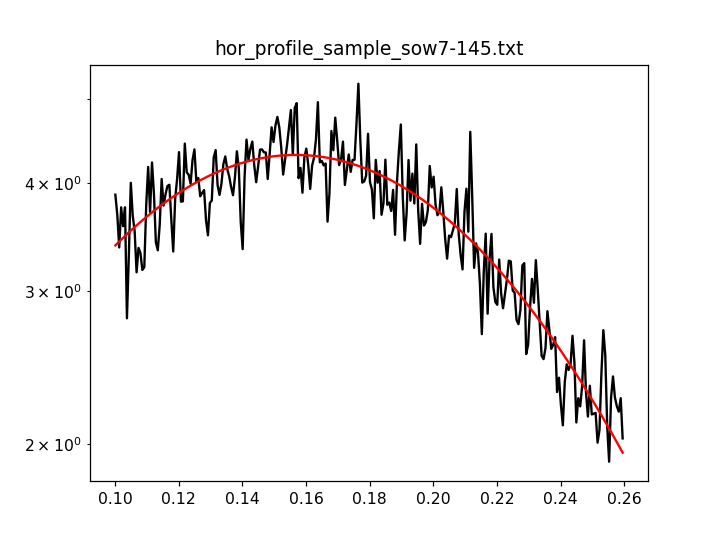

In [79]:
from astropy.modeling import models, fitting
i=0
qsss = [[0.1, 0.26], 
        [0.1, 0.26],
        [0.1, 0.26],
       ]
all_mean, all_amp, all_stdev=[],[],[]

# plt.figure()
for fi in os.listdir(ResDir):
    if 'hor_profile' in fi:
        print(fi)
#         idx, idx1=fi.find('DNA'), fi.find('.txt')
        pr = np.loadtxt(os.path.join(ResDir, fi))
        
        qss = qsss[i]
        print(qss)
        idxmin = np.argmin(abs(pr[:, 0]-qss[0]))
        idxmax = np.argmin(abs(pr[:, 0]-qss[1]))
        print(idxmin, idxmax)
        q1, I1 = pr[idxmin:idxmax, 0], pr[idxmin:idxmax, 1]
        plt.figure()
        plt.title(fi)
        plt.plot(q1, I1, 'k')

        qs = q1
        intensities = I1

        g_init  = models.Gaussian1D(amplitude=np.max(intensities), mean=q1[np.argmax(intensities)], stddev=.001)
        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, qs, intensities)

        x = np.linspace(qs[0], qs[-1], 100)
        plt.plot(x, g(x), 'r')

        all_mean = all_mean + [g.mean.value]
        all_stdev = all_stdev + [g.stddev.value]
        all_amp = all_amp + [g.amplitude.value]

        plt.yscale('log')
        plt.show()
        i+=1


<IPython.core.display.Javascript object>


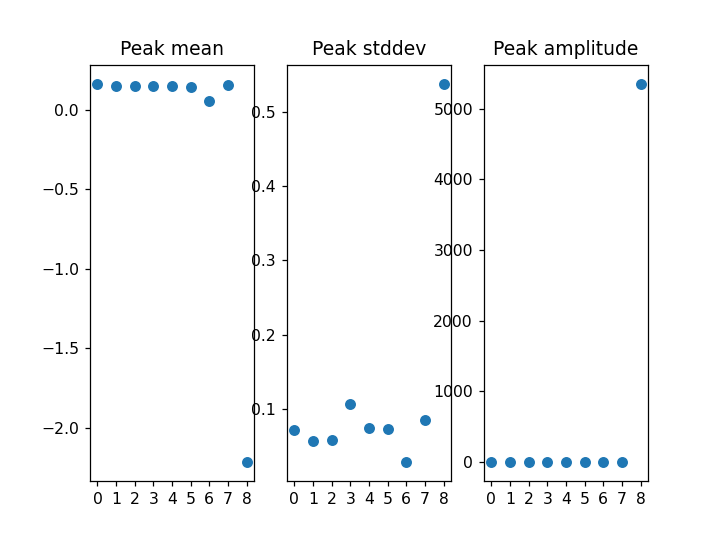

In [32]:
plt.figure()
plt.subplot(131)
plt.title('Peak mean')
plt.plot(all_mean, 'o')
plt.xticks(np.linspace(0, len(all_mean)-1, len(all_mean)))
plt.subplot(132)
plt.title('Peak stddev')
plt.plot(all_stdev, 'o')
plt.xticks(np.linspace(0, len(all_mean)-1, len(all_mean)))
plt.subplot(133)
plt.title('Peak amplitude')
plt.plot(np.asarray(all_amp), 'o')
plt.xticks(np.linspace(0, len(all_mean)-1, len(all_mean)))

plt.show()

In [82]:
all_mean

[-0.16509286164139303, -0.1598472811196629, -0.15936788051180625]

In [80]:
all_mean

[0.16796266798492934, 0.15936804517516295, 0.15672917321022437]

In [84]:
print((0.1679+0.165)*0.5, (0.1598472811196629+0.15936804517516295)*0.5, (0.15936788051180625+0.15672917321022437)*0.5)

0.16645 0.15960766314741293 0.1580485268610153


In [85]:
all_mean = [0.16645, 0.15960766314741293, 0.1580485268610153]

print(0.1*2*np.pi/np.asarray(all_mean))

FWHM = 2 * np.asarray(all_stdev) * np.sqrt(2 * np.log(2))

[3.77481845 3.93664388 3.97547856]


In [86]:
fwhm = 2*np.asarray(all_stdev)*np.sqrt(2 * np.log(2))
fwhm

array([0.30645058, 0.20585643, 0.18392048])

In [37]:
all_amp

[0.5313901645109007,
 0.8522009312637219,
 0.6842859066940499,
 0.30454336635910023,
 0.4122343774337134,
 0.3651576209653708,
 2.261199239815232,
 0.35612974569009503,
 5356.355201324903]

<IPython.core.display.Javascript object>


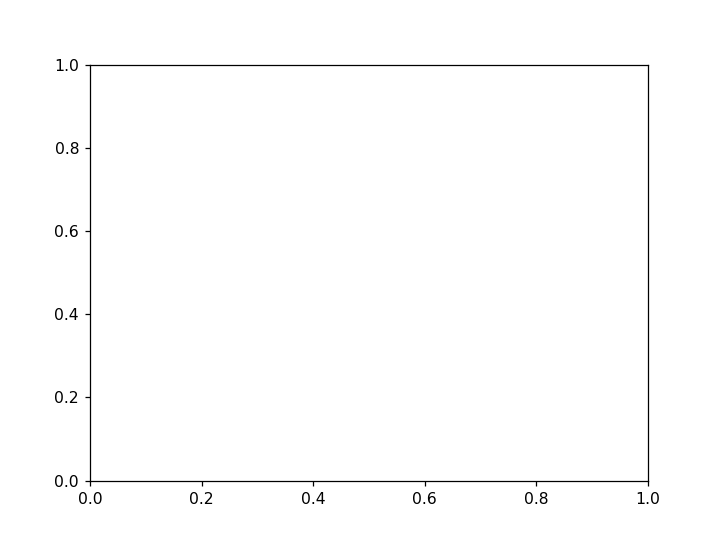

ValueError: x and y must have same first dimension, but have shapes (7,) and (9,)

In [38]:
fwhm = 2*np.asarray(all_stdev)*np.sqrt(2 * np.log(2))
grain_size = 0.1*0.9*1.5408/(fwhm*np.asarray(all_mean))
plt.figure()
# plt.subplot(131)
plt.plot(np.linspace(1, 7, 7), grain_size, 'o')
plt.xticks(np.linspace(1, 7, 7))
plt.ylabel('Grain size (nm)')
plt.show()

In [ ]:

plt.figure()
# plt.subplot(131)
plt.plot(np.linspace(1, 7, 7), 0.1*2*np.pi/np.asarray(all_mean), 'o')
plt.xticks(np.linspace(1, 7, 7))

plt.ylabel('Distance between origami (nm)')
plt.show()

In [ ]:
np.linspace(0, 6, 7)